---
# __Statistical Foundations of Data Science__
##  __Regression Project__
---


### __Team Members__

1. Thapelo Duma - 2493083
2. Lebohang Mosia - 2320396
3. Lusanda Mdhlalose - 2332720
4. Masixole Boya - 1869204

### __Project Objective__

Predicting the number of cases a lawyer will handle this month given the number that they handled last month, their age, their level of seniority and the number of sick days taken in the last year.

### __Table of Contents__

- [0.1 Python Libraries](#01-python-libraries)
- [0.2 Data Preprocessing](#02-data-preprocessing)
    - [0.2.1 Data Encoding](#021-data-encoding)
    - [0.2.2 Data Scaling](#022-data-scaling)
    - [0.2.3 Train-Test Split](#023-train-test-split)

- [Question 1](#question-1)

- [Question 2](#question-2)
    - [Technique 1: Forward Selection](#technique-1-forward-selection)
    - [Technique 2: Backward Selection](#technique-2-backward-selection)
    - [Technique 3: Lasso Selection](#technique-3-lasso-selection)
    - [Technique 4: Ridge Regression](#technique-4-ridge-regression)

- [Question 3](#question-3)

- [Question 4](#question-4)

- [Question 5](#question-5)
- [Question 6](#question-6)

- [Question 7](#question-7)

***

## 0.1 __Python Libraries__

In [216]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.decomposition import PCA


In [217]:
# pd.set_option('display.max_colwidth', 100)  # adjusting dataframe width

# read in the dataset
data = pd.read_csv('data/lawyers')

## 0.2 __Data Preprocessing__

In [218]:
# first five rows of the data
data.head()

,ID,AGE,CTM,CLM,LVL,SDY
0,1,54,11,10,Senior Partner,35
1,2,25,1,0,Associate,10
2,3,30,9,8,Associate,87
3,4,26,3,3,Associate,8
4,5,28,3,5,Associate,4


###     0.2.1 __Data Encoding__

In [219]:
# one hot encode the senority of the lawyers
data_encoded = pd.get_dummies(data, columns=['LVL'], dtype=int)

# first five rows of the encoded data
data_encoded.head()

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,1,54,11,10,35,0,0,0,0,1
1,2,25,1,0,10,1,0,0,0,0
2,3,30,9,8,87,1,0,0,0,0
3,4,26,3,3,8,1,0,0,0,0
4,5,28,3,5,4,1,0,0,0,0


### 0.2.2 __Data Scaling__

In [220]:
# normalize the data to make sure all features are on the same scale
normalizer = MinMaxScaler().set_output(transform='pandas')
normalized_data = normalizer.fit_transform(data_encoded)

In [221]:
# the normalized data
normalized_data

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.000000,0.58,0.40,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.005025,0.00,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.010050,0.10,0.32,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.015075,0.02,0.08,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.020101,0.06,0.08,0.20,0.021978,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,0.979899,0.22,0.20,0.20,0.027473,0.0,0.0,0.0,1.0,0.0
196,0.984925,0.36,0.20,0.24,0.021978,0.0,0.0,0.0,1.0,0.0
197,0.989950,0.82,0.28,0.36,0.060440,0.0,0.0,0.0,0.0,1.0
198,0.994975,0.92,0.36,0.36,0.098901,0.0,0.0,0.0,0.0,1.0


### 0.2.3 __Train-Test Split__

In [222]:
y = normalized_data['CTM']  # the target
X = normalized_data[[column for column in normalized_data.columns if column not in ['CTM', 'ID'] ]] # the features

In [223]:
X.head()    # first five rows of the features

,AGE,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.58,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.10,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.02,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.06,0.20,0.021978,1.0,0.0,0.0,0.0,0.0


In [224]:
y.head()    # first five rows of the target

0    0.40
1    0.00
2    0.32
3    0.08
4    0.08
Name: CTM, dtype: float64

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # randomly splitting the data into 70% training and 30% testing

---
# Question 1
---

['AGE', 'CLM', 'SDY']


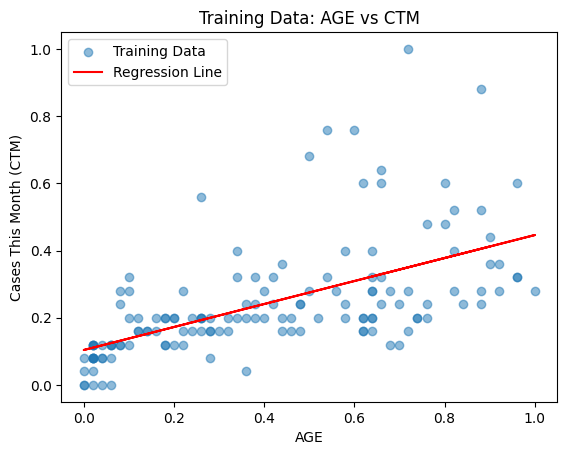

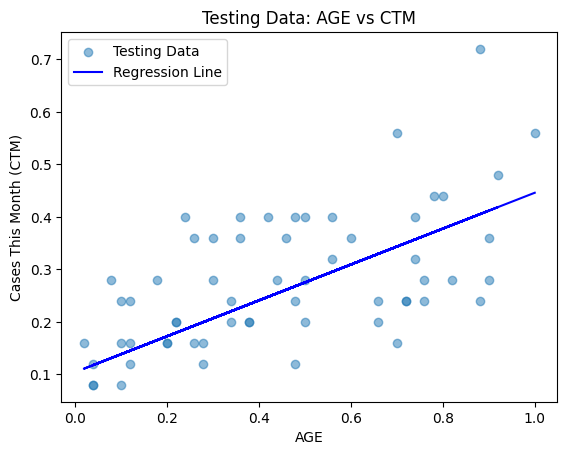

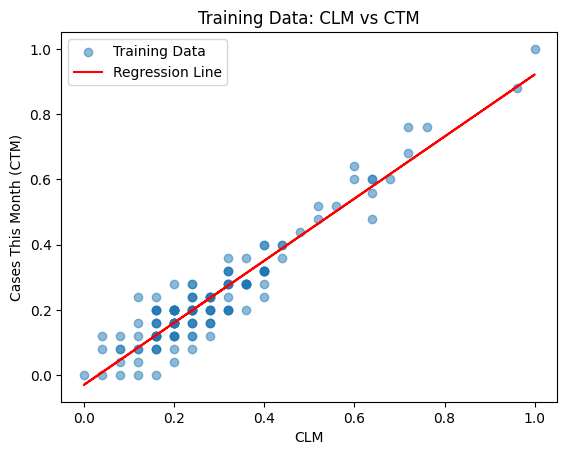

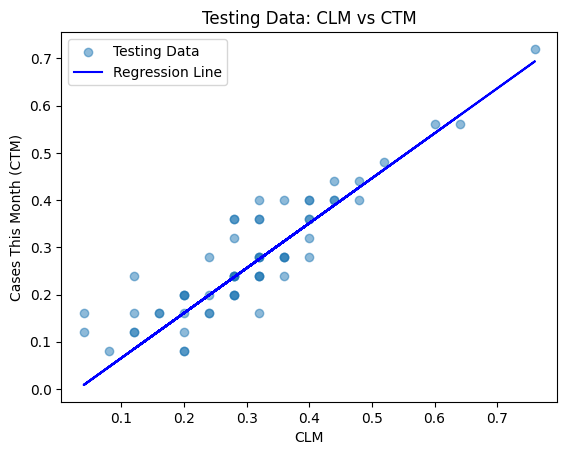

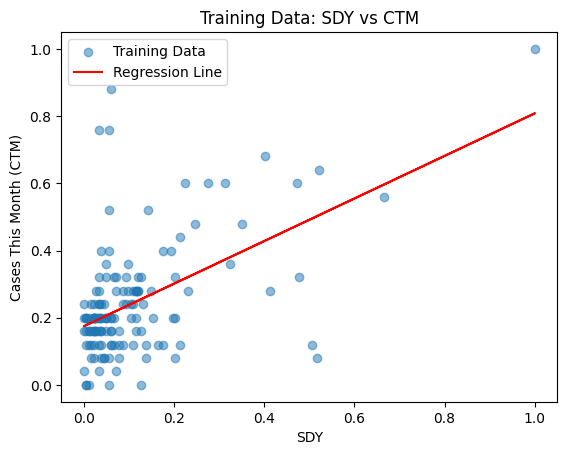

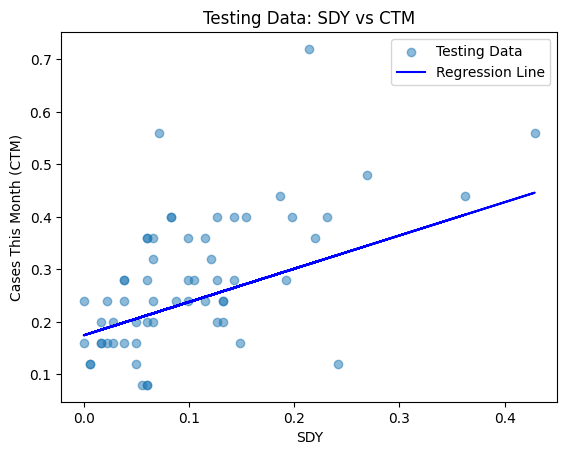

In [226]:
# continuous features
# Define predictor and response variables
predictors = [feature for feature in X.columns if not feature.startswith('LVL')]    # create a list of continuous variables
print(predictors)

# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Add a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Add a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Plot training data
    plt.scatter(X_train[predictor], y_train, alpha=0.5, label='Training Data')
    plt.plot(X_train[predictor], predictions_train, color='red', label='Regression Line')
    plt.title(f'Training Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()
    
    # Plot testing data
    plt.scatter(X_test[predictor], y_test, alpha=0.5, label='Testing Data')
    plt.plot(X_test[predictor], predictions_test, color='blue', label='Regression Line')
    plt.title(f'Testing Data: {predictor} vs CTM')
    plt.xlabel(predictor)
    plt.ylabel('Cases This Month (CTM)')
    plt.legend()
    plt.show()


In [227]:
# Iterate over predictors
for predictor in predictors:
    # Training data
    X_train_predictor = sm.add_constant(X_train[predictor])  # Add a constant term to the predictor
    model_train = sm.OLS(y_train, X_train_predictor).fit()  # Fit the model
    predictions_train = model_train.predict(X_train_predictor)
    
    # Testing data
    X_test_predictor = sm.add_constant(X_test[predictor])  # Add a constant term to the predictor
    predictions_test = model_train.predict(X_test_predictor)
    
    # Output regression results
    print(f"Predictor: {predictor}")
    print(f"Training R-squared: {model_train.rsquared}")
    print(f"Coefficient: {model_train.params[predictor]}")
    print(f"Intercept: {model_train.params['const']}")
    print()
    
    print(f"Predictor: {predictor}")
    print(f"Testing R-squared: {1 - np.sum((y_test - predictions_test)**2) / np.sum((y_test - np.mean(y_test))**2)}")
    print()

Predictor: AGE
Training R-squared: 0.3408110199982266
Coefficient: 0.34204640720418955
Intercept: 0.10397136483417752

Predictor: AGE
Testing R-squared: 0.3109536325590121

Predictor: CLM
Training R-squared: 0.9000889512935107
Coefficient: 0.9511538547461071
Intercept: -0.029416705761454807

Predictor: CLM
Testing R-squared: 0.7742067825060769

Predictor: SDY
Training R-squared: 0.2786748408654719
Coefficient: 0.6337053266832136
Intercept: 0.17458648570411572

Predictor: SDY
Testing R-squared: 0.23888786821378571



The three scatter plots above show the variables CLM, SDY, and AGE, each plotted against CTM. The data split is 70% training and 30% testing. The training and testing R-squared values of each variable are below the plots.

<strong>CLM<strong>

The best fit line fits the training data excellently because it passes through a lot of the datapoints and captures the trend. The corresponding value of the coefficient of determination is 0.9000889512935107 which implies that about 90% of the variation in the CTM is predictable from the CLM. 

The best fit line passing through the testing data has a lower r-squared value of 0.774206782506077. This time, about 77% of the variation in the CTM is predictable from the CLM. These are the two highest values of all coefficients of determination.
    
<strong>SDY<strong>

In the scatter plot for the training data, the best fit line has a poor fit. A lot of the datapoints lie between the 0 to 50 interval and the data does not show a relationship. The best fit line passes through a lot of the datapoints - without following a particular trend - in that region and passes through much less beyond it. This makes the line seem arbitrary. The r-squared value is 0.27867484086547234. This means that about 27% of the variation in the CTM is predictable from the SDY. 

The testing data is more spread out and the fit of the line is a lot poorer. There are also a lot more outliers. The r-squared value is 0.23888786821378483, implying that about 23% of the variation in the CTM is predictable from the SDY.

<strong>AGE<strong>

The scatter plot for the testing data indicates that the best fit line has a poor fit because the data points are widely scattered around the line and there are a lot of outliers. This is however, a better fit than the best fit line in the scatter plot of the testing data. The line does not capture the trend and the datapoints are spread more widely around the line.
 
This corresponds to the low r-squared values of each dataset. The training dataset has an r-squared value of 0.3408110199982268, that tells us that about 34% of the variation in the CTM is predictable by the AGE. The testing dataset has an r-squared value of 0.3109536325590123. This time, about 31% of the variation in the CTM is predictable by AGE. These values tell us that the line does not describe much of the variance.

Training R-squared: 0.5080202336808439
Testing R-squared: 0.26822655383816063


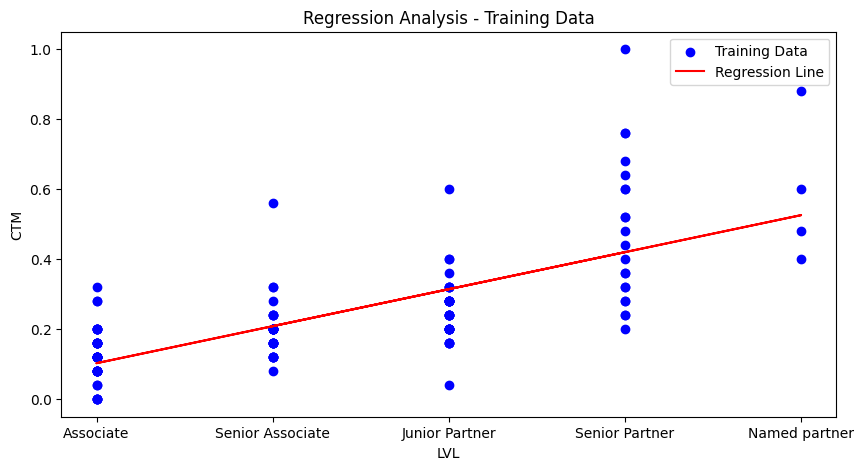

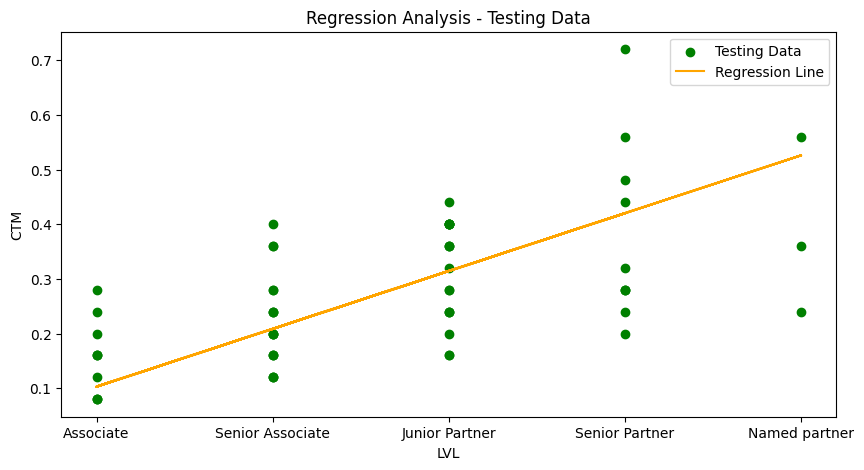

In [228]:
data['LVL'] = data['LVL'].map({
    'Associate': 1,
    'Senior Associate': 2,
    'Junior Partner': 3,
    'Senior Partner': 4,
    'Managing Partner': 5
})

X_catergorical = data[['LVL']]
X_catergorical, X_test_catgorical, y_train_categorical, y_test_catgorical = train_test_split(X_catergorical, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_catergorical, y_train_categorical)

train_pred = model.predict(X_catergorical)
test_pred = model.predict(X_test_catgorical)

train_r2 = r2_score(y_train_categorical, train_pred)
test_r2 = r2_score(y_test_catgorical, test_pred)

print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)

# Step 7: Plot scatter plots with regression line for training data
plt.figure(figsize=(10, 5))
plt.scatter(X_catergorical, y_train_categorical, color='blue', label='Training Data')
plt.plot(X_catergorical, train_pred, color='red', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Training Data')
plt.legend()
plt.show()

# Step 8: Plot scatter plots with regression line for testing data
plt.figure(figsize=(10, 5))
plt.scatter(X_test_catgorical, y_test_catgorical, color='green', label='Testing Data')
plt.plot(X_test_catgorical, test_pred, color='orange', label='Regression Line')
plt.xticks([1, 2, 3, 4, 5], ['Associate', 'Senior Associate', 'Junior Partner', 'Senior Partner', 'Named partner'])
plt.xlabel('LVL')
plt.ylabel('CTM')
plt.title('Regression Analysis - Testing Data')
plt.legend()
plt.show()

<strong>LVL<strong>

The scatter plot above depicts the variable, LVL, plotted against CTM. The data was split the same way the others were (70% training, 30% testing). 

The r-squared value of the training data is 0.5080202336808441 which implies that the line of best fit has a moderate fit. For the testing data, the r-squared value is 0.26822655383816074 and this tells us that the fit is very poor because it is low.

# Question 2
---

## Technique 1: Forward Selection

Iteration 1: Selected features: ['CLM'], R-squared: 0.7742


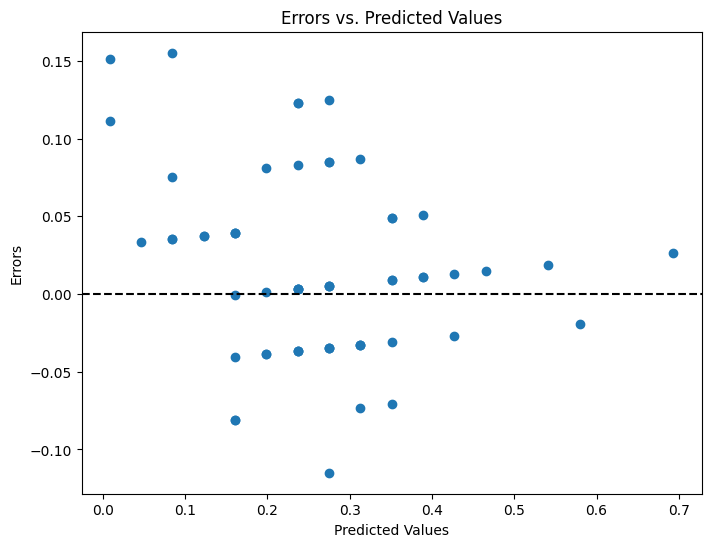

Iteration 2: Selected features: ['CLM', 'LVL_Senior Partner'], R-squared: 0.7593


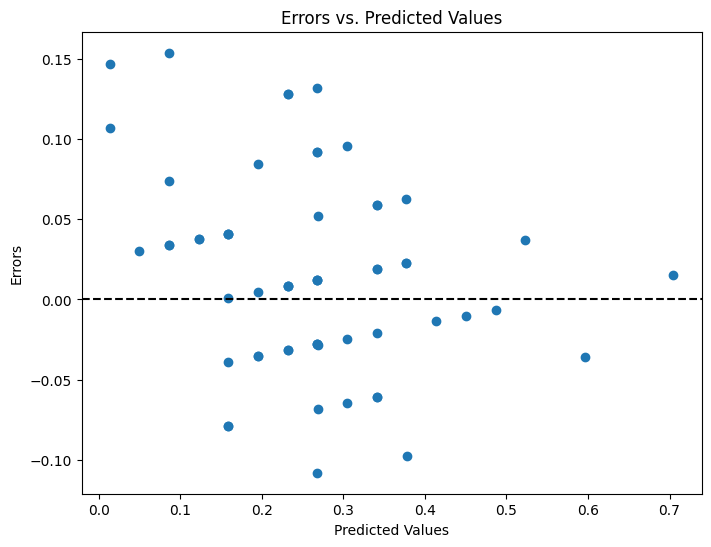

Iteration 3: Selected features: ['CLM', 'SDY', 'LVL_Senior Partner'], R-squared: 0.7630


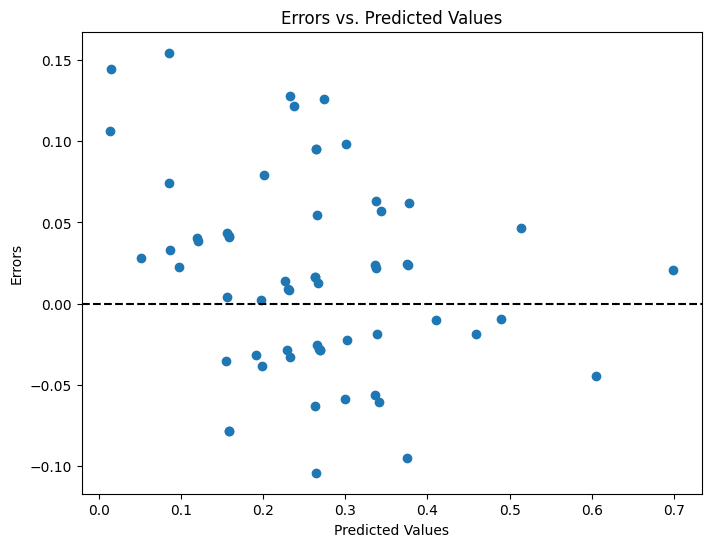

Iteration 4: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Senior Partner'], R-squared: 0.7610


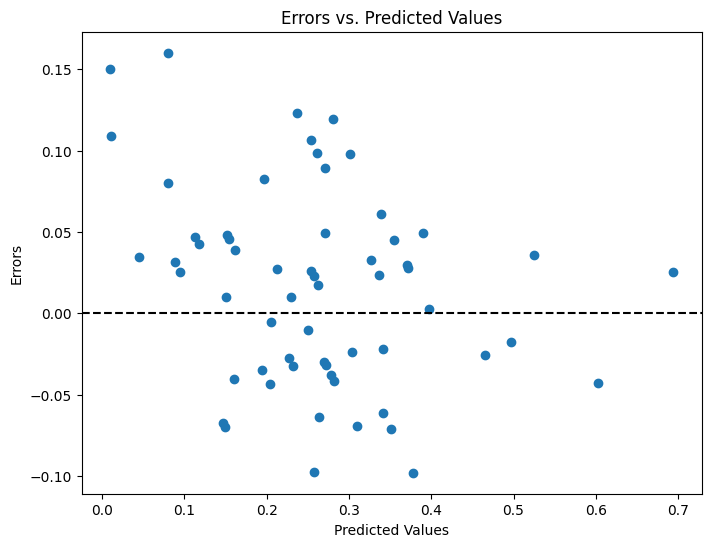

Iteration 5: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Managing Partner', 'LVL_Senior Partner'], R-squared: 0.7644


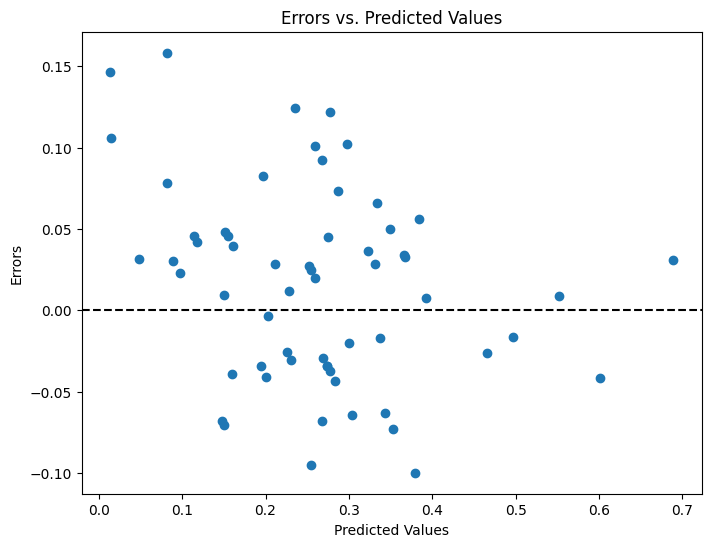

Iteration 6: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'], R-squared: 0.7645


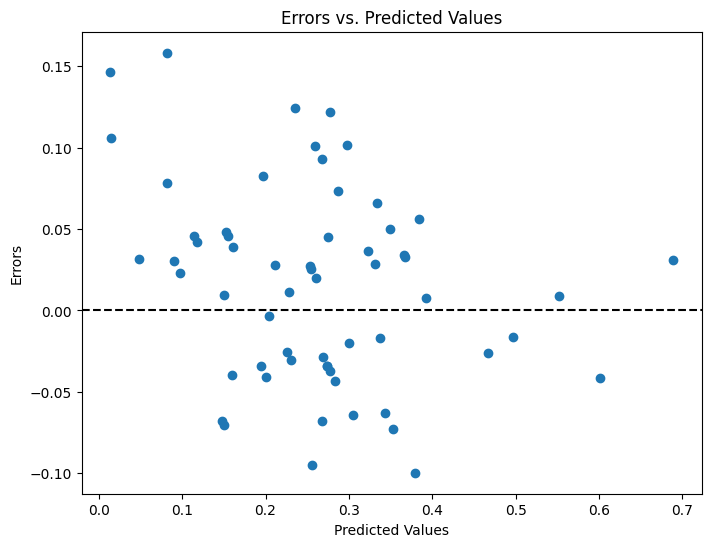

Iteration 7: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Associate', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'], R-squared: 0.7647


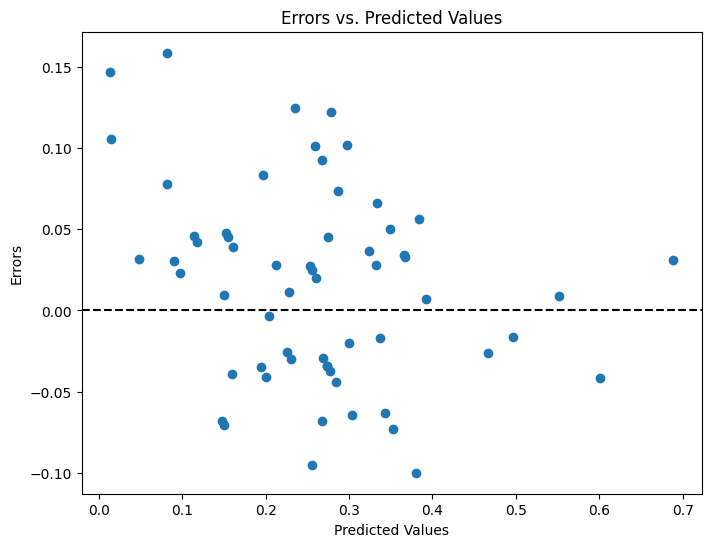

In [229]:
# Initialize a DataFrame with NaN values to store selected features, AIC and BIC values
nan_values = np.full((1, 3), np.nan)
forward_selected_features_df = pd.DataFrame(nan_values, columns=['Selected Features', 'AIC', 'BIC'])

# creating the regression instance
linear_model = LinearRegression() 

# creating an object for Forward Selection using R squared score
selection_process = SequentialFeatureSelector(linear_model, direction='forward', scoring='r2')  

# iterating through the features 
for i in range(1, len(X_train.columns)):
    selection_process.n_features_to_select = i  # number of features for the object to select per iteration
    selection_process.fit(X_train, y_train)     # train the model

    selected_features = list(X_train.columns[selection_process.get_support()])    # return the feature(s) selected based on the R squared significance

    linear_model.fit(X_train[selected_features], y_train) # train the model using the selected feature(s)
    y_pred = linear_model.predict(X_test[selected_features]) # make prediction using test data from the selected features
    r_squared = r2_score(y_test, y_pred)    # evaluate the R squared value using the selected features

    # Calculate AIC based of the test and predicted data
    k = len(selected_features) + 1  # number of features and intercept
    n = len(y_test)  # number of samples
    rss = np.sum((y_test - y_pred) ** 2)  # residual sum of squares
    aic = n * np.log(rss / n) + 2 * k  # AIC calculation

    # Calculate BIC
    bic = n * np.log(rss / n) + k * np.log(n)  # BIC calculation

    # Append selected features, AIC, and BIC values to the DataFrame
    forward_selected_features_df = pd.concat([forward_selected_features_df, pd.DataFrame({'Selected Features': [selected_features], 'AIC': [aic], 'BIC': [bic]})], ignore_index=True)
    forward_selected_features_df = forward_selected_features_df.dropna()
    
    print(f'Iteration {i}: Selected features: {selected_features}, R-squared: {r_squared:.4f}') # Display each iteration

    # Plot the error plots for each iteration
    errors = y_test - y_pred  # calculating the error between the predicted and the true values

    # the actual plots
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()



## Technique 2: Backward Selection

Iteration 7: Selected features: ['CLM', 'SDY', 'LVL_Associate', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7718


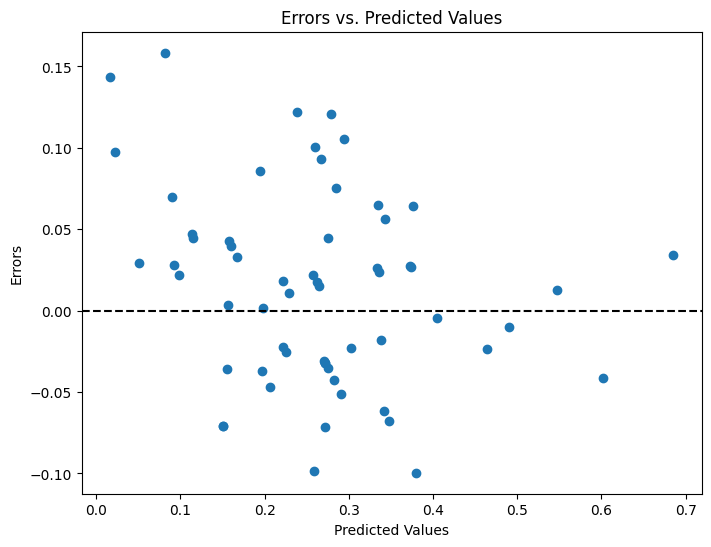

Iteration 6: Selected features: ['CLM', 'SDY', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7718


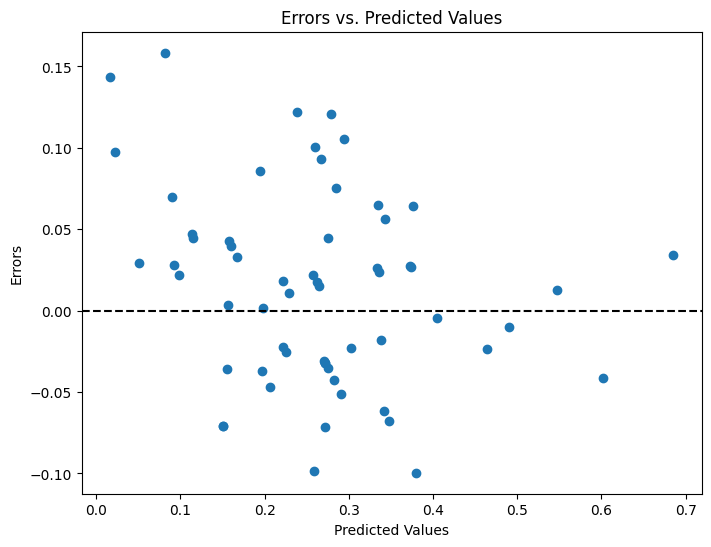

Iteration 5: Selected features: ['CLM', 'SDY', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Partner'] R-squared: 0.7694


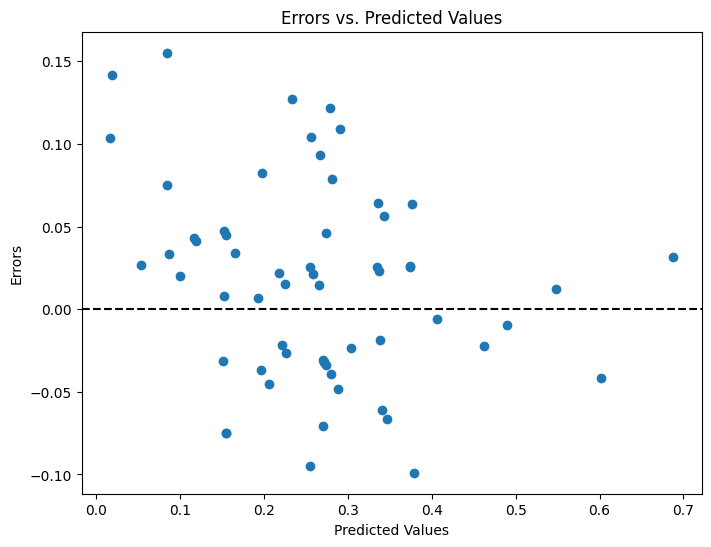

Iteration 4: Selected features: ['CLM', 'SDY', 'LVL_Managing Partner', 'LVL_Senior Partner'] R-squared: 0.7696


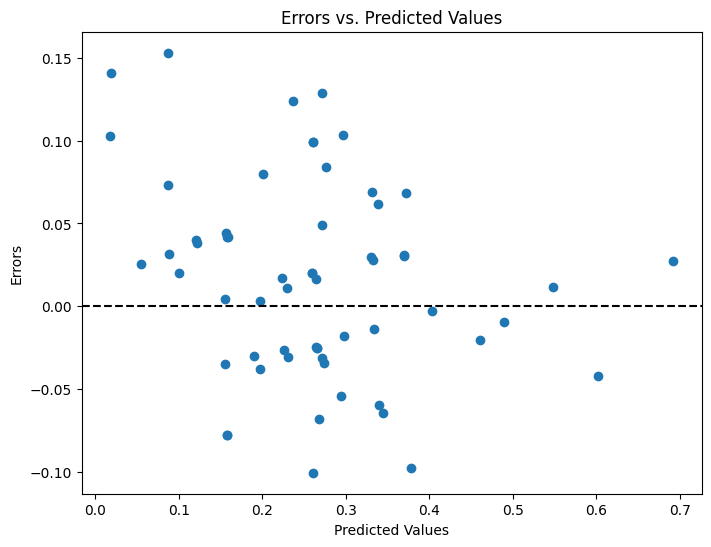

Iteration 3: Selected features: ['CLM', 'SDY', 'LVL_Senior Partner'] R-squared: 0.7630


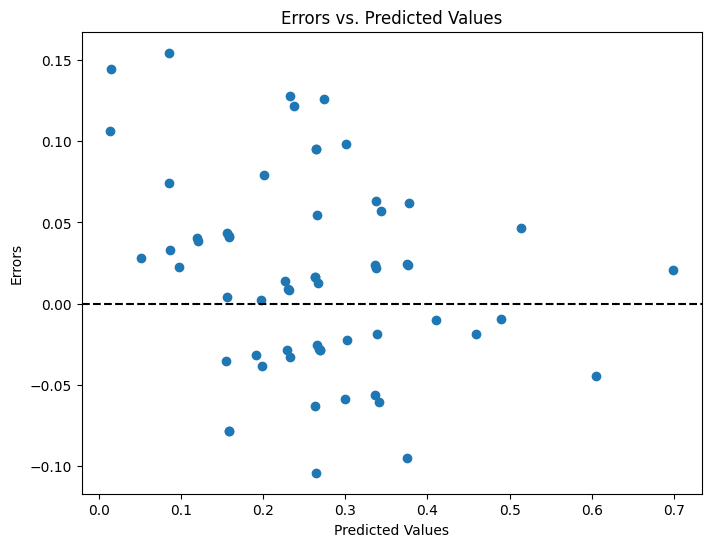

Iteration 2: Selected features: ['CLM', 'LVL_Senior Partner'] R-squared: 0.7593


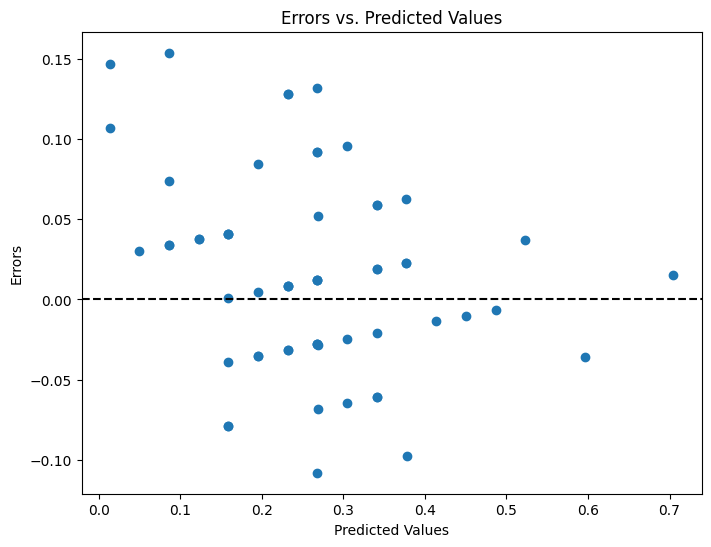

Iteration 1: Selected features: ['CLM'] R-squared: 0.7742


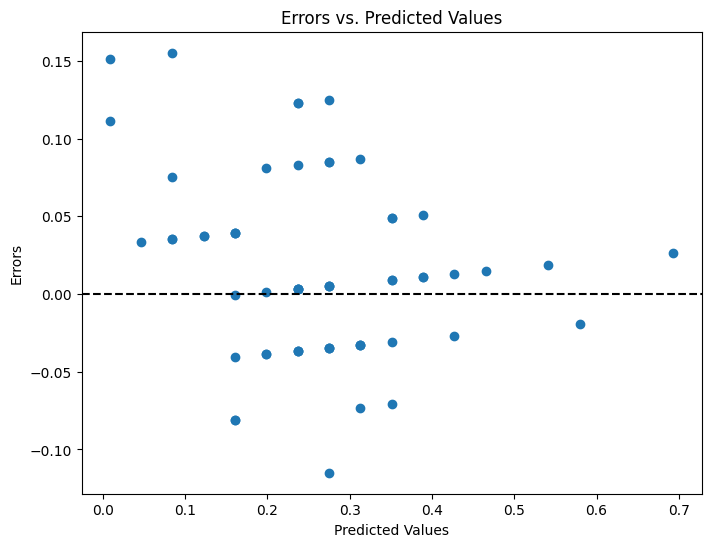

In [230]:
# Initialize a DataFrame with NaN values to store selected features, AIC and BIC values
nan_values = np.full((1, 3), np.nan)
Backward_selected_features_df = pd.DataFrame(nan_values, columns=['Selected Features', 'AIC', 'BIC'])

# create an object for Backward Selection based on Rsquared score
selection_process = SequentialFeatureSelector(linear_model, direction='backward', scoring='r2') 

# iterate though the features
for i in range(len(X_train.columns)-1, 0, -1):
    selection_process.n_features_to_select = i  # number of features for the object to select per iteration
    selection_process.fit(X_train, y_train)     # train the model

    selected_features = list(X_train.columns[selection_process.get_support()])    # return the feature(s) selected based on the R squared significance

    linear_model.fit(X_train[selected_features], y_train) # train the model using the selected feature(s)
    y_pred = linear_model.predict(X_test[selected_features]) # make prediction using test data from the selected features
    r_squared = r2_score(y_test, y_pred)    # evaluate the R squared value using the selected features

    # Calculate AIC
    k = len(selected_features) + 1  # number of features and intercept
    n = len(y_test)  # number of samples
    rss = np.sum((y_test - y_pred) ** 2)  # residual sum of squares
    aic = n * np.log(rss / n) + 2 * k  # AIC calculation

    # Calculate BIC
    bic = n * np.log(rss / n) + k * np.log(n)  # BIC calculation

    # Append selected features, AIC, and BIC values to the DataFrame
    Backward_selected_features_df = pd.concat([Backward_selected_features_df, pd.DataFrame({'Selected Features': [selected_features], 'AIC': [aic], 'BIC': [bic]})], ignore_index=True)
    Backward_selected_features_df = Backward_selected_features_df.dropna()

    print(f'Iteration {i}: Selected features: {selected_features} R-squared: {r_squared:.4f}') # Display each iteration

    # Plot the error plots for each iteration
    
    errors = y_test - y_pred  # calculating the error between the predicted and the true values

    # the actual plots
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()
    

## Technique 3: Lasso Selection

The selection of features, for alpha = 0.01, in each iteration gives the importance of those features in predicting the number of cases this month. This is determined based on the penalized regression coefficients estimated by Lasso regression. Features that are consistently selected across multiple iterations - `CLM`, `LVL_Associate`, and `LVL_Senior Partner`, are deemed to have 'higher importance' in the model. The absence of the other features as iterations go on indicate that these features are likely to have been penalized to zero coefficients. W e say that these features do not contribute significantly to predicting the target variable, after considering the effects of other features.
The selection of features, for alpha = 0.01, in each iteration gives the importance of those features in predicting the number of cases this month. This is determined based on the penalized regression coefficients estimated by Lasso regression. Features that are consistently selected across multiple iterations - 'CLM', 'LVL_Associate', and 'LVL_Senior Partner', are deemed to have 'higher importance' in the model. The absence of the other features as iterations go on indicate that these features are likely to have been penalized to zero coefficients. We say that these features do not contribute significantly to predicting the target variable, after considering the effects of other features.

As such, having `CLM`, `LVL_Associate`, and `LVL_Senior Partner` as the only features in the final iterations suggests that these features have the most significant impact on predicting the number of cases this month according to the model.

Iteration 1: Selected features: ['CLM'] R-squared: 0.7118


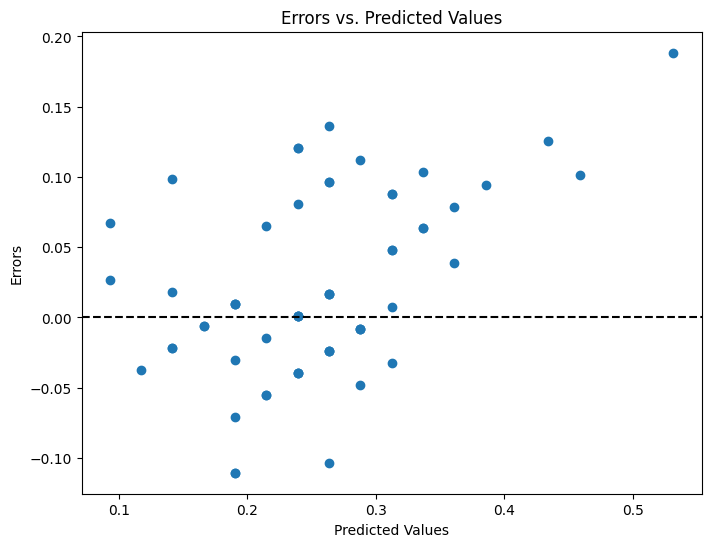

Iteration 2: Selected features: ['CLM', 'LVL_Senior Partner'] R-squared: 0.6865


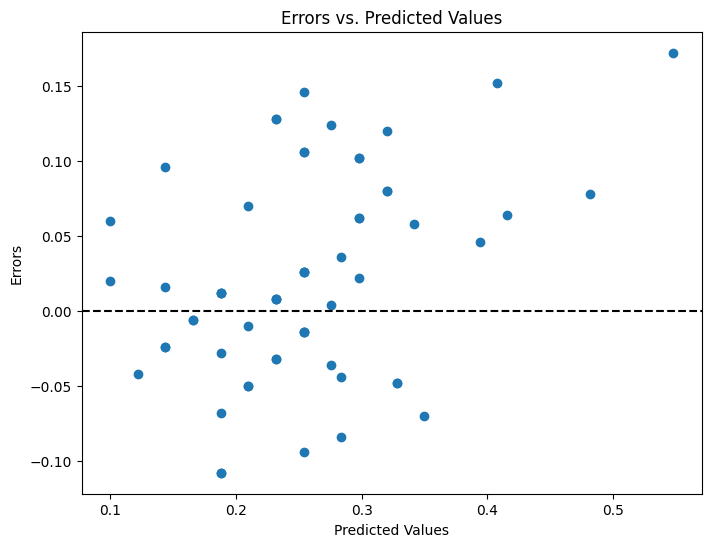

Iteration 3: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


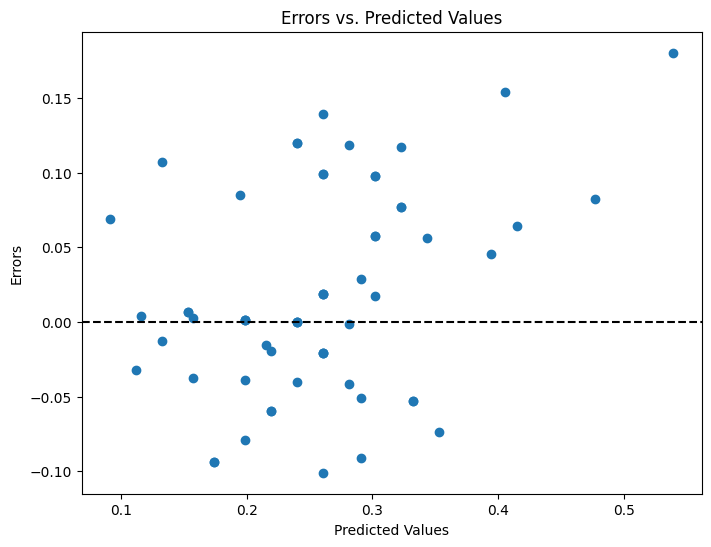

Iteration 4: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


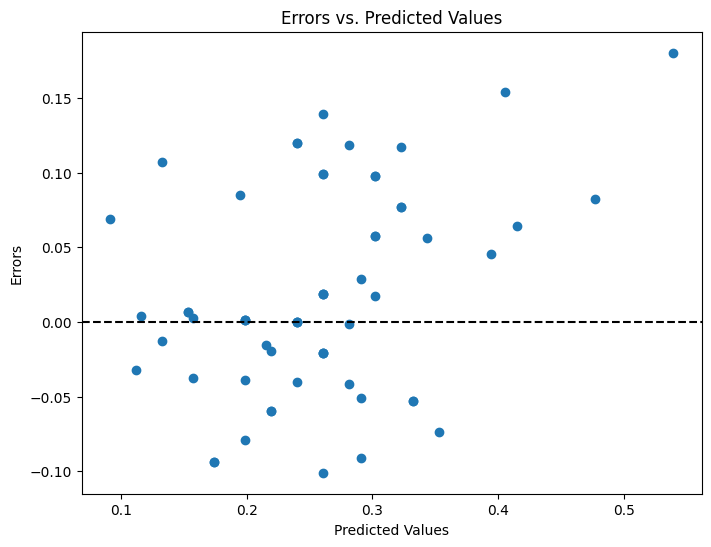

Iteration 5: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


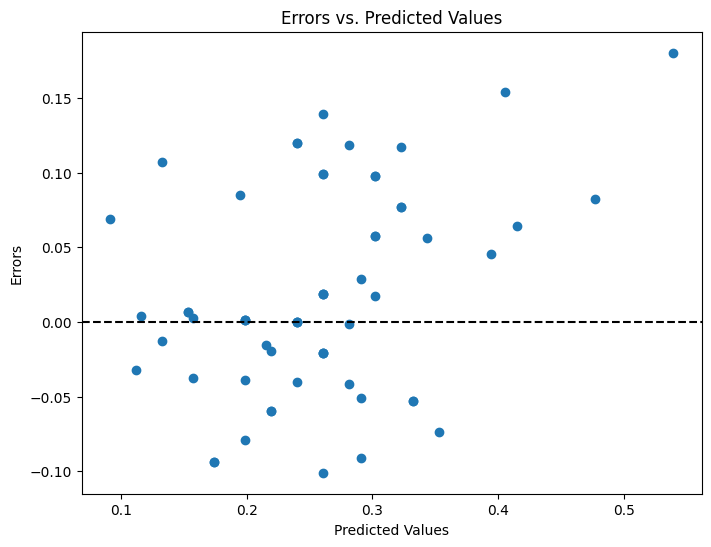

Iteration 6: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


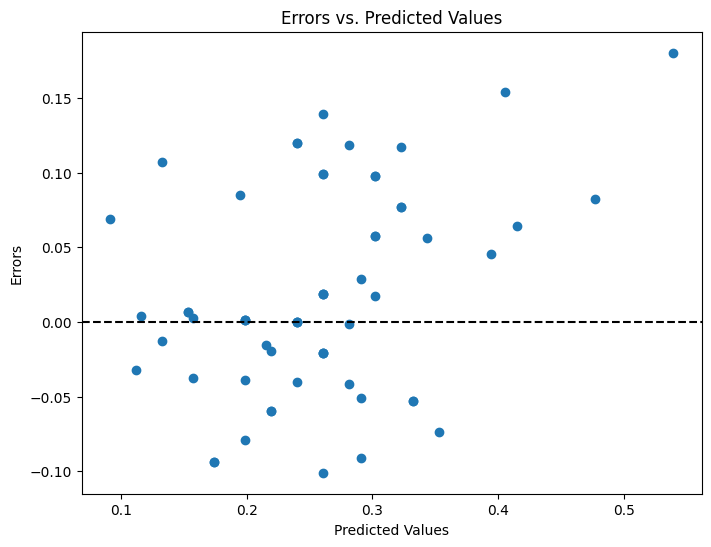

Iteration 7: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


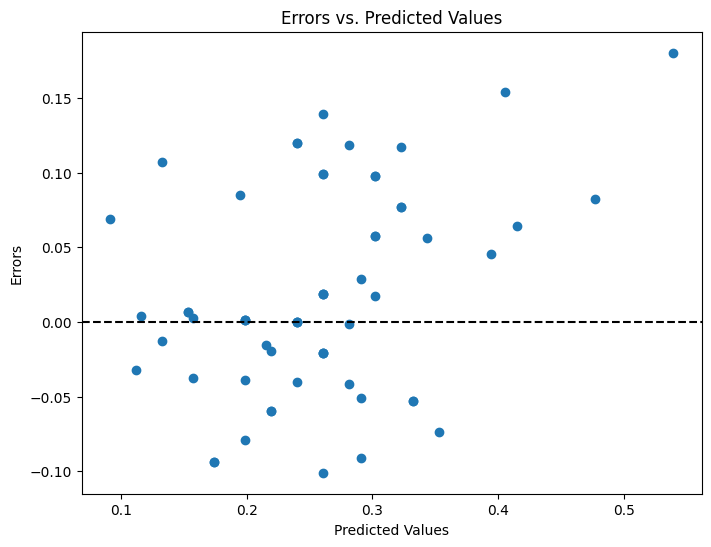

Iteration 8: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6902


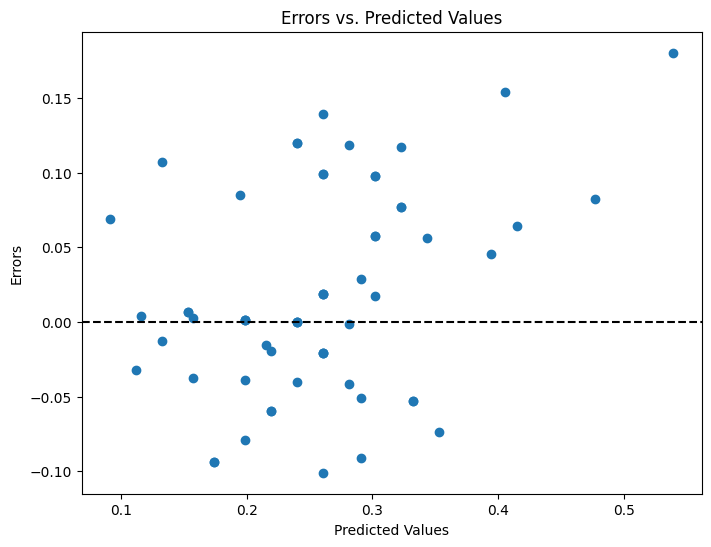

In [231]:
lasso_model = Lasso(alpha=0.01) # initializing the lasso regression instance 

selection_process = SelectFromModel(lasso_model)  # creating an object to select the number of features

# Initialize a DataFrame with NaN values to store selected features, AIC and BIC values
nan_values = np.full((1, 3), np.nan)
lasso_selected_features_df = pd.DataFrame(nan_values, columns=['Selected Features', 'AIC', 'BIC'])

selected_features = []  #  a list to store selected features

# iterate thorugh the features
for i in range(1, len(X_train.columns) + 1):
    selection_process.max_features = i      # number of features for the object to select per iteration 
    
    selection_process.fit(X_train, y_train) # train the model
    
    selected_mask = selection_process.get_support()
    selected_features = list(X_train.columns[selected_mask])    #  return the feature(s) selected based on the alpha = 0.01 value
    
    lasso_model.fit(X_train[selected_features], y_train) # train the model using the selected feature(s)
    y_pred = lasso_model.predict(X_test[selected_features]) # make prediction using test data from the selected features
    r_squared = r2_score(y_test, y_pred)    # evaluate the R squared value using the selected features

    # Calculate AIC
    k = len(selected_features) + 1  # number of features and intercept
    n = len(y_test)  # number of samples
    rss = np.sum((y_test - y_pred) ** 2)  # residual sum of squares
    aic = n * np.log(rss / n) + 2 * k  # AIC calculation

    # Calculate BIC
    bic = n * np.log(rss / n) + k * np.log(n)  # BIC calculation

    # Append selected features, AIC, and BIC values to the DataFrame
    lasso_selected_features_df = pd.concat([lasso_selected_features_df, pd.DataFrame({'Selected Features': [selected_features], 'AIC': [aic], 'BIC': [bic]})], ignore_index=True)
    lasso_selected_features_df = lasso_selected_features_df.dropna()


    
    print(f'Iteration {i}: Selected features: {selected_features} R-squared: {r_squared:.4f}') # Display each iteration

    # Plot the error plots for each iteration
    
    errors = y_test - y_pred  # calculating the error between the predicted and the true values

    # the actual plots
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()

    

## Technique 4: Ridge Regression

The selection of features, for alpha = 1.0, in each iteration indicates the importance of those features in predicting the number of cases this month, as determined by the Ridge regression coefficients. Features consistently selected across multiple iterations - `CLM` and `SDY`, are considered to have higher importance in the model. The absence of other features in later iterations suggests that these features have been dampened but not entirely eliminated, indicating that they still contribute somewhat to predicting the target variable, albeit to a lesser extent compared to `CLM` and `SDY`.

Having `CLM` and `SDY` as the only features in the final iterations suggests that these features have the most significant impact on predicting the number of cases this month according to the Ridge regression model.

Iteration 1: Selected features: ['CLM'] R-squared: 0.7736


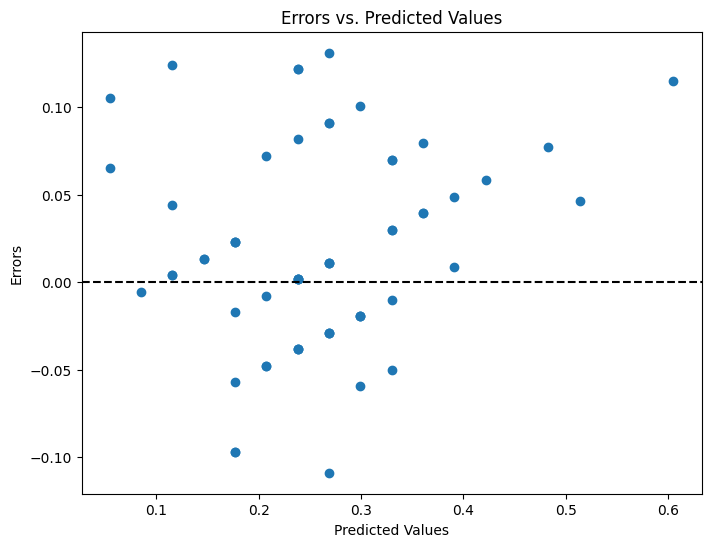

Iteration 2: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


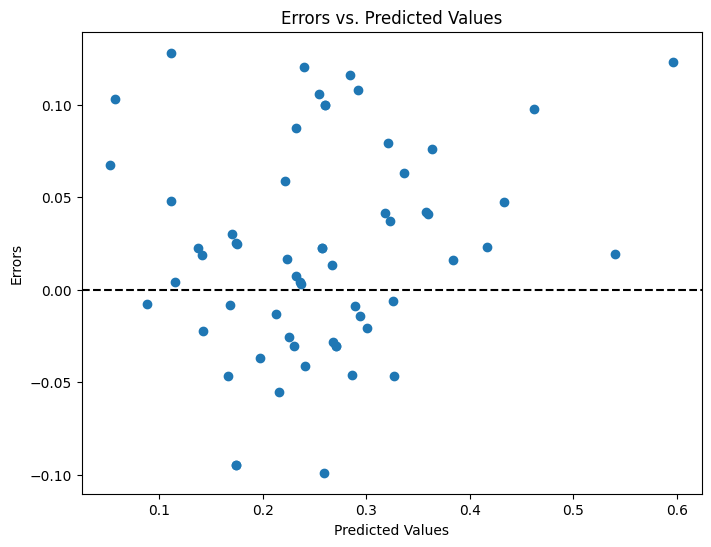

Iteration 3: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


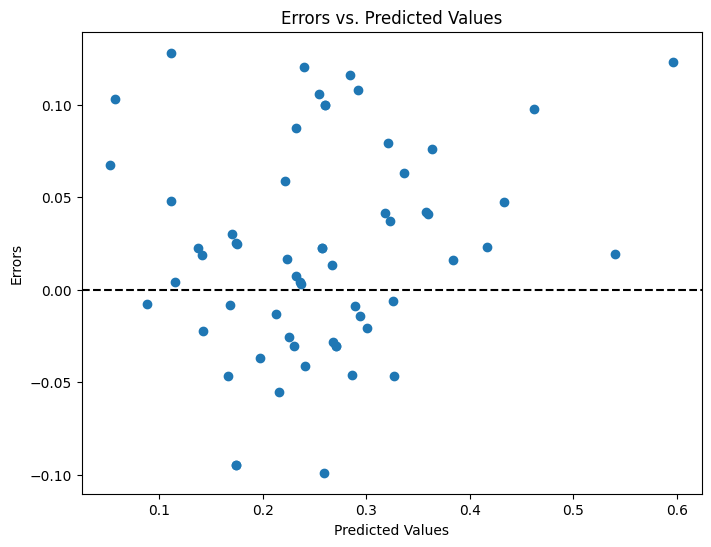

Iteration 4: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


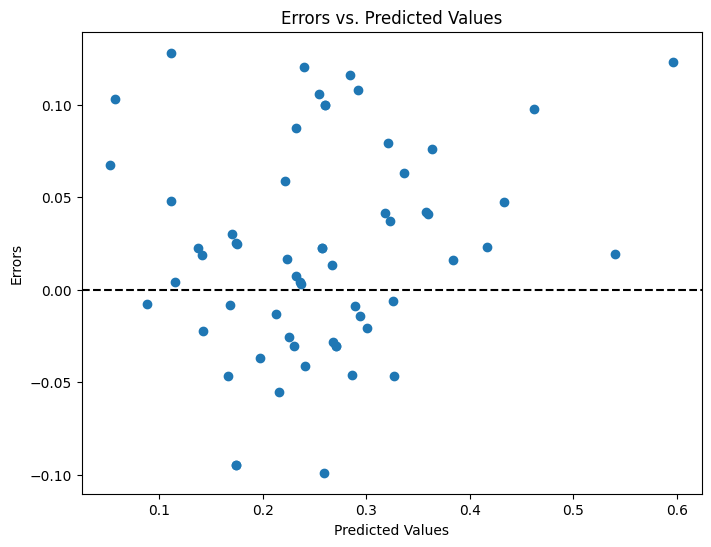

Iteration 5: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


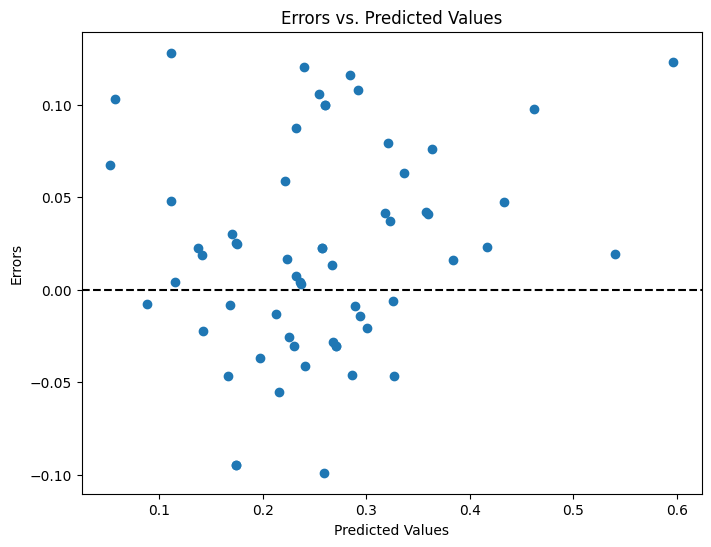

Iteration 6: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


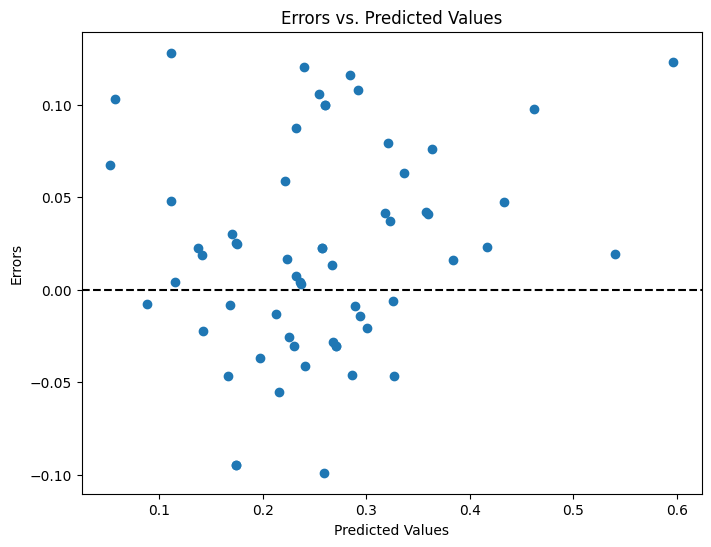

Iteration 7: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


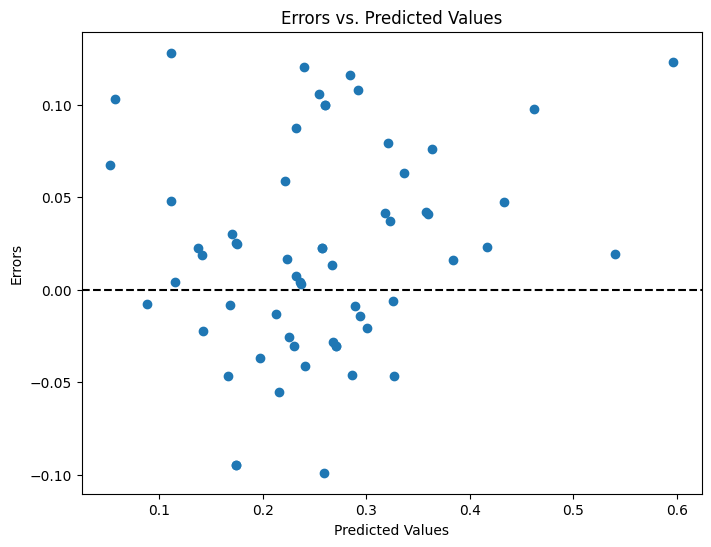

Iteration 8: Selected features: ['CLM', 'SDY'] R-squared: 0.7786


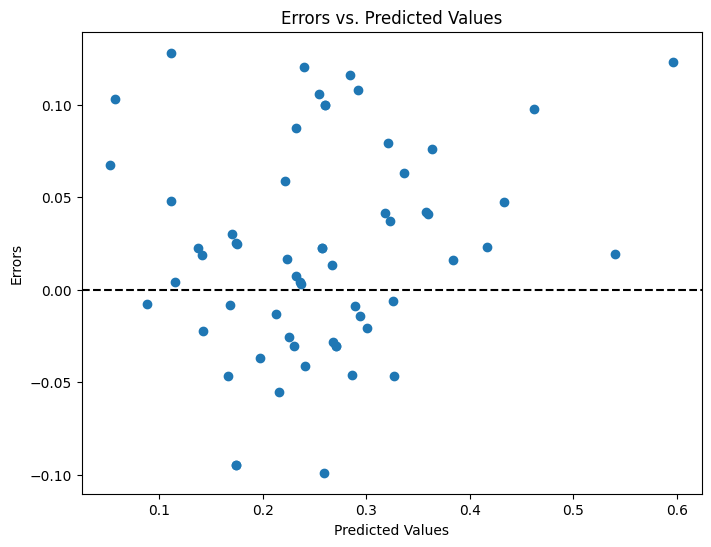

In [232]:
ridge_model = Ridge(alpha=1.0) # initializing the ridge regression instance 

selection_process = SelectFromModel(ridge_model)  # creating an object to select the number of features

# Initialize a DataFrame with NaN values to store selected features, AIC and BIC values
nan_values = np.full((1, 3), np.nan)
ridge_selected_features_df = pd.DataFrame(nan_values, columns=['Selected Features', 'AIC', 'BIC'])

selected_features = []  #  a list to store selected features

# iterate thorugh the features
for i in range(1, len(X_train.columns) + 1):
    selection_process.max_features = i      # number of features for the object to select per iteration 
    
    selection_process.fit(X_train, y_train) # train the model
    
    selected_mask = selection_process.get_support()
    selected_features = list(X_train.columns[selected_mask])    #  return the feature(s) selected based on the alpha = 0.01 value
    
    ridge_model.fit(X_train[selected_features], y_train) # train the model using the selected feature(s)
    y_pred = ridge_model.predict(X_test[selected_features]) # make prediction using test data from the selected features
    r_squared = r2_score(y_test, y_pred)    # evaluate the R squared value using the selected features

    # Calculate AIC
    k = len(selected_features) + 1  # number of features and intercept
    n = len(y_test)  # number of samples
    rss = np.sum((y_test - y_pred) ** 2)  # residual sum of squares
    aic = n * np.log(rss / n) + 2 * k  # AIC calculation

    # Calculate BIC
    bic = n * np.log(rss / n) + k * np.log(n)  # BIC calculation

    # Append selected features, AIC, and BIC values to the DataFrame
    ridge_selected_features_df = pd.concat([ridge_selected_features_df, pd.DataFrame({'Selected Features': [selected_features], 'AIC': [aic], 'BIC': [bic]})], ignore_index=True)
    ridge_selected_features_df = ridge_selected_features_df.dropna()

    
    print(f'Iteration {i}: Selected features: {selected_features} R-squared: {r_squared:.4f}') # Display each iteration

    # Plot the error plots for each iteration
    
    errors = y_test - y_pred  # calculating the error between the predicted and the true values

    # the actual plots
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()

This section made use of four techniques for multiple variable techniques which included the Forward Selection, Backward Selection, Lasso Rregression and Ridge Regression. The model that is the best for each technique and how it was selected follows below.

**Forward Selection**

The model that worked best was with `CLM` (number of cases last month) as the only feature, the respective R squared value for this regression was 0.7742. The subsequent models with more features returned an R squared value that varied between 0.759 and 0.765. The selection of features that contributed the most to the regression models was selected using Forward Selection which used the R squared score to select which individual features contribute more individually to the regression model.

**Backward Selection**

The model that worked best was with `CLM` (number of cases last month) once again, the respective R squared value for this regression was 0.7742. The subsequent models with more features returned an R squared value that varied between 0.7593 and 0.7718. The selection of features that contributed the most to the regression models was selected using Backward Selection which used the R squared score once again to select which individual features contribute more individually to the regression model.

**Lasso Regression**

The model that worked best was with `CLM` (number of cases last month) once again, the respective R squared value for this regression was 0.7118. The subsequent models with more features returned an R squared value that varied between 0.6865 and 0.6902. The selection of features that contributed the most to the regression models was selected using Lasso Regression with alpha value 0.01 in order to penalize features that contributed the least to the regression model.


**Ridge Regression**

The model performed best with the feature `CLM` (number of cases last month) being the primary predictor once again. The R-squared value for the initial model with `CLM` as the only feature was 0.7736, indicating a good fit. Iterations that followed, which incorporated additional features resulted in minor improvements, with the R-squared value stabilizing at 0.7786 when `SDY` was added alongside `CLM`.

The selection of features that contributed most to the regression model was determined using Ridge Regression with an alpha value of 1.0. This alpha value helped to penalize less significant features while still retaining them in the model. In this case, `CLM` and `SDY` were identified as the most influential features for predicting the number of cases this month according to the Ridge regression model.


# Question 3
---

We implemented four different models; Forward Selection, Backward Selection, Ridge Regression and Lasso Regression. 

We used R-squared as our evaluation metric and it helped determine which models work best for our data. With R-squared, the value from 0 to 1 is interpreted as percentages. The higher the value, the better the model is. These models have the different variables modelled against CTM as our current indicator.

For the Forward Selection Model, we see that it ranges from the 75-77 percent region, where 77.42% accuracy is its highest value when working with this model.

For the Backward Selection Model, we see that the models ranges from the 75-77 percent region, where 77.42% is the highest accuracy value when working with this model.

For the Lasso Regression model, it ranges from 68-71 percent region with 71.18% being the highest accuracy value.

For the Ridge model, it remains in a stable percentage region of 77% where the differences are minor. The highest accuracy value is 77.86%.

For these four models, we can see that the models get better with performance in different ways. We start with the stepwise models and see they are closely related. The backward selection has a higher percentage with the subsequent models, whereas forward selection has lower percentages with the subsequent models. This shows that the removal of variables is a better indicator for getting CTM as opposed to adding variables, despite them having the same highest accuracy value. Lasso regression has the lowest R-squared values of our models with its highest accuracy not even meaasuring to the subsequent models of Backward and forward selection. This is due to the fact that a lot of pruning is done to ensure no zero coefficients, leaving the model with only 3 variables left to consider. Ridge regression kept a very stable R-squared value in that even the subsequent models were also in the same region as the highest accuracy value, only differing by mere tenths.

# Question 4
---

Considering our goal in this assignment will be to predict the number of cases a lawyer will handle this month given the
number that they handled last month(CLM), their age(AGE), their level of seniority(LVL) and the number of sick days taken
in the last year(SDY), we feel that these models make sense as they are easy to understand since they visualise and easily calculate the accuracy indicators.

With calculating R-squared, we can get a percentage that will display the correlation between the different variables. If we take the variables in their singularity, we can see that Cases Last Month(CLM) have the biggest influence on the Cases this Month(CTM). This shows that most of the decisions made on CTM should be made using CLM. From the single variable regression plots, it is also the AGE that has the second most impact and while SDY follows closely to it. For all four models, we can see that the CLM gives us the highest R-squared accuracy.

`Question 2` explains our models and how they performed, here we describe what our models are and why we used them.
Forward selection starts with a single variable in the set of variables and adds to it, until all the variables have been added to the set. Similarly, backward selection starts with a complete set of variables and then removes variables from the set, again, until we are left with on variable in the set. Typically, both methods try to include or exclude the variable that offers the highest performance increase.

Ridge Regression aims to reduce Overfitting, while Lasso Regression reduces the features and hence can be used for feature selection. Ridge regression uses a technique called L2 regularization and this helps us achieve regression by adding a penalty to the model's cost function in order to minimize its value. Lasso regression uses the L1 regularization technique. It does the same thing as ridge regression does, but, the only difference is in the formula - instead of adding the sum of square of weights, lasso regression adds the absolute value of weights to the cost.

# Question 5
---

## Model Selection Criteria: AIC and BIC

To support the selected models, the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) were computed and values stored during the modelling in question two for each respective model.

**Akaike Information Criterion (AIC):**  
AIC is a model selection criterion used to determine which model is the best fit for a given dataset while balancing goodness of fit and model complexity. Lower AIC values indicate a better model, balancing fit and complexity.

**Bayesian Information Criterion (BIC):**  
BIC is another model selection criterion, like AIC, that balances model fit and complexity. However, BIC places a stronger penalty on the number of parameters, which makes it more stringent against overfitting compared to AIC. When comparing multiple models, the one with the lowest BIC is typically preferred. BIC is generally more conservative than AIC, meaning it tends to favor simpler models with fewer parameters.

For linear regression, the AIC and BIC was calculated in terms of residual sum of squares:

$$ \text{AIC} = 2k + n \ln\left(\frac{\text{RSS}}{n}\right) $$

$$ \text{BIC} = k \ln(n) + n \ln\left(\frac{\text{RSS}}{n}\right) $$

Where:
- k is the number of parameters, including the intercept.
- n is the number of observations.
-  RSS is the residual sum of squares of the model.

### Forward Selection

In [233]:

forward_selected_features_df.sort_values(by='AIC')

,Selected Features,AIC,BIC
0,[CLM],-332.152813,-327.964124
1,"[CLM, LVL_Senior Partner]",-326.311385,-320.028351
2,"[CLM, SDY, LVL_Senior Partner]",-325.253549,-316.876171
3,"[AGE, CLM, SDY, LVL_Senior Partner]",-322.731246,-312.259523
4,"[AGE, CLM, SDY, LVL_Managing Partner, LVL_Seni...",-321.613402,-309.047334
5,"[AGE, CLM, SDY, LVL_Managing Partner, LVL_Seni...",-319.634673,-304.974261
6,"[AGE, CLM, SDY, LVL_Associate, LVL_Managing Pa...",-317.679189,-300.924432


Based on the above dataframe for the regression models created using the forward selection technique with R squared scoring. The model with `CLM` as the only predictor is the best model as it has the lowest AIC and BIC scores.

### Backward Selection

In [234]:
Backward_selected_features_df.sort_values(by='AIC')

,Selected Features,AIC,BIC
6,[CLM],-332.152813,-327.964124
5,"[CLM, LVL_Senior Partner]",-326.311385,-320.028351
4,"[CLM, SDY, LVL_Senior Partner]",-325.253549,-316.876171
3,"[CLM, SDY, LVL_Managing Partner, LVL_Senior Pa...",-324.948321,-314.476598
2,"[CLM, SDY, LVL_Junior Partner, LVL_Managing Pa...",-322.878764,-310.312697
1,"[CLM, SDY, LVL_Junior Partner, LVL_Managing Pa...",-321.524455,-306.864043
0,"[CLM, SDY, LVL_Associate, LVL_Junior Partner, ...",-319.524455,-302.769699


Based on the above dataframe for the regression models created using the backward selection technique with R squared scoring. The model with `CLM` as the only predictor is the best model as it has the lowest AIC and BIC score.

### Lasso Regression

In [235]:

lasso_selected_features_df.sort_values(by='AIC')

,Selected Features,AIC,BIC
0,[CLM],-317.514364,-313.325675
1,"[CLM, LVL_Senior Partner]",-310.462999,-304.179965
2,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223
3,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223
4,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223
5,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223
6,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223
7,"[CLM, LVL_Associate, LVL_Senior Partner]",-309.170602,-300.793223


Based on the above dataframe for the regression models created using the lasso regression technique with alpha value 0.01. The model with `CLM` as the only predictor is the best model as it has the lowest AIC and BIC score.

### Ridge Regression

In [236]:
ridge_selected_features_df.sort_values(by='AIC')

,Selected Features,AIC,BIC
0,[CLM],-331.994015,-327.805326
1,"[CLM, SDY]",-331.344567,-325.061534
2,"[CLM, SDY]",-331.344567,-325.061534
3,"[CLM, SDY]",-331.344567,-325.061534
4,"[CLM, SDY]",-331.344567,-325.061534
5,"[CLM, SDY]",-331.344567,-325.061534
6,"[CLM, SDY]",-331.344567,-325.061534
7,"[CLM, SDY]",-331.344567,-325.061534


Based on the above dataframe for the regression models created using the ridge regression technique with alpha value 1.0 . The model with `CLM` as the only predictor is the best model as it has the lowest AIC and BIC score.

# Question 6
---

In [237]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE                   200 non-null    float64
 1   CLM                   200 non-null    float64
 2   SDY                   200 non-null    float64
 3   LVL_Associate         200 non-null    float64
 4   LVL_Junior Partner    200 non-null    float64
 5   LVL_Managing Partner  200 non-null    float64
 6   LVL_Senior Associate  200 non-null    float64
 7   LVL_Senior Partner    200 non-null    float64
dtypes: float64(8)
memory usage: 12.6 KB


# 6.1 __Principal Component Analysis__

In [238]:
pca = PCA(n_components=2)  
pca_result_train = pca.fit_transform(X_train)

pca_df_train = pd.DataFrame(data=pca_result_train, columns=['PC1','pc2'])

original_feature_names = X_train.columns

pca_df_train.columns = [f'PCA_{i+1}_{original_feature_names[i]}' for i in range(pca_df_train.shape[1])]


print("PCA df Training")
pca_df_train.head(3)


PCA df Training


,PCA_1_AGE,PCA_2_CLM
0,-0.459251,0.053150
1,-0.105775,0.829816
2,-0.619328,-0.539703


In [239]:

# for testing set

pca_result_test = pca.fit_transform(X_test)

pca_df_test= pd.DataFrame(data=pca_result_test, columns=['PC1','pc2'])

original_feature_names = X_test.columns

pca_df_test.columns = [f'PCA_{i+1}_{original_feature_names[i]}' for i in range(pca_df_test.shape[1])]


print("\nPCA df Testing set")
pca_df_test.head(3)



PCA df Testing set


,PCA_1_AGE,PCA_2_CLM
0,-0.148741,0.423854
1,0.790703,-0.314136
2,0.204037,-0.034849


## 6.1 __Training Linear Regression__

In [240]:

X_pca = pca_df_train[pca_df_train.columns]


model = LinearRegression()
model.fit(pca_df_train, y_train)

y_pred_pca = model.predict(pca_df_test)

r_squared_pca = r2_score(y_test, y_pred_pca)
print("R-squared for PCA:", r_squared_pca)


R-squared for PCA: 0.028728606437998905


# 6.2 __New feature Generation__

### 6.2.1 __Mean Aggregation__

In [241]:



# Mean Aggregation
X['mean_AGE_CLM_SDY'] = X[['AGE', 'CLM', 'SDY']].mean(axis=1)

data_aggregation_mean = X.drop(columns= ['AGE', 'CLM', 'SDY'])
data_aggregation_mean = pd.DataFrame(data_aggregation_mean)
print("DataFrame with Aggregated Features:\n")
data_aggregation_mean.head()


DataFrame with Aggregated Features:



C:\Users\mdhla\AppData\Local\Temp\ipykernel_14204\2801053741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_AGE_CLM_SDY'] = X[['AGE', 'CLM', 'SDY']].mean(axis=1)


,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner,mean_AGE_CLM_SDY
0,0.0,0.0,0.0,0.0,1.0,0.390769
1,1.0,0.0,0.0,0.0,0.0,0.018315
2,1.0,0.0,0.0,0.0,0.0,0.299341
3,1.0,0.0,0.0,0.0,0.0,0.061319
4,1.0,0.0,0.0,0.0,0.0,0.093993


### 6.2.2 __Standard Deviation Aggregation__

In [242]:
# Standard Deviation Aggregation
X['std_AGE_CLM_SDY'] = X[['AGE', 'CLM', 'SDY']].std(axis=1)


data_aggregation_std = X.drop(columns= ['AGE', 'CLM', 'SDY'])
data_aggregation_std = pd.DataFrame(data_aggregation_std)
print("DataFrame with Aggregated Features (standard deviation):\n")
data_aggregation_std.head()


DataFrame with Aggregated Features (standard deviation):



,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner,mean_AGE_CLM_SDY,std_AGE_CLM_SDY
0,0.0,0.0,0.0,0.0,1.0,0.390769,0.194011
1,1.0,0.0,0.0,0.0,0.0,0.018315,0.031723
2,1.0,0.0,0.0,0.0,0.0,0.299341,0.189856
3,1.0,0.0,0.0,0.0,0.0,0.061319,0.052212
4,1.0,0.0,0.0,0.0,0.0,0.093993,0.093753


# Question 7
---

Principal component analysis (PCA) is a versatile statistical method for reducing a cases-by-variables data table to its essential features, called principal components. Principal components are a few linear combinations of the original variables that maximally explain the variance of all the variables. In the process, the method provides an approximation of the original data table using only these few major components. Our principle components in this case are AGE and CLM.

The features engineered were the Mean Aggregation and the Standard Deviation Aggregation. These calculate the mean and standard deviation of the three numerical values, namely AGE, CLM and SDY. The combination of these values help visualise the data more closely providing very valuable info for the model.
